# Loading the libraries and the data

In [1]:
import pandas as pd
import warnings
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('https://github.com/pmahdi/random/blob/main/Table_8_Offenses_Known_to_Law_Enforcement_by_State_by_City_2021.xlsx?raw=true', skiprows=[0, 1, 2, 5879])

# Exploring and cleaning the data

#### Basic layout of the data

In [3]:
display(df.info())
display(df.describe())
display(df.shape)
display(df.columns)
display(df.index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5875 entries, 0 to 5874
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   State                                 51 non-null     object 
 1   City                                  5873 non-null   object 
 2   Population                            5873 non-null   float64
 3   Violent
crime                         5873 non-null   float64
 4   Murder and
nonnegligent
manslaughter  5873 non-null   float64
 5   Rape                                  5873 non-null   float64
 6   Robbery                               5873 non-null   float64
 7   Aggravated
assault                    5873 non-null   float64
 8   Property
crime                        5873 non-null   float64
 9   Burglary                              5873 non-null   float64
 10  Larceny-
theft                        5873 non-null   float64
 11  Motor
vehicle
the

None

,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson
count,5.873000e+03,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000,5873.000000
mean,2.139720e+04,100.298655,1.699472,10.415801,16.045462,72.137919,511.110165,73.218968,366.485272,71.405925,3.030989
std,7.479825e+04,670.879401,12.948879,45.085169,144.712577,484.829149,2617.877790,408.060674,1758.486923,504.133812,17.933034
min,8.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.453000e+03,3.000000,0.000000,0.000000,0.000000,2.000000,22.000000,3.000000,16.000000,2.000000,0.000000
50%,6.429000e+03,11.000000,0.000000,2.000000,1.000000,8.000000,76.000000,10.000000,57.000000,6.000000,0.000000
75%,1.748200e+04,39.000000,0.000000,7.000000,4.000000,27.000000,285.000000,37.000000,219.000000,24.000000,1.000000
max,2.339252e+06,28325.000000,464.000000,1173.000000,7729.000000,18959.000000,96048.000000,14749.000000,65729.000000,15570.000000,543.000000


(5875, 13)

Index(['State', 'City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter', 'Rape', 'Robbery',
       'Aggravated\nassault', 'Property\ncrime', 'Burglary', 'Larceny-\ntheft',
       'Motor\nvehicle\ntheft', 'Arson'],
      dtype='object')

RangeIndex(start=0, stop=5875, step=1)

#### Finding and dealing with missing values

In [4]:
display(df.isna().sum())  # All the missing values shown by column
display(df.loc[df['City'].isna(), ])  # No information for District of Columnbia and Florida 

State                                     5824
City                                         2
Population                                   2
Violent\ncrime                               2
Murder and\nnonnegligent\nmanslaughter       2
Rape                                         2
Robbery                                      2
Aggravated\nassault                          2
Property\ncrime                              2
Burglary                                     2
Larceny-\ntheft                              2
Motor\nvehicle\ntheft                        2
Arson                                        2
dtype: int64

,State,City,Population,Violent\ncrime,Murder and\nnonnegligent\nmanslaughter,Rape,Robbery,Aggravated\nassault,Property\ncrime,Burglary,Larceny-\ntheft,Motor\nvehicle\ntheft,Arson
653,DISTRICT OF COLUMBIA1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
654,FLORIDA1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Dropping the rows corresponding to District of Columbia and Florida
df = df.loc[df['City'].notna(), ]

In [6]:
df.fillna(method='ffill', inplace=True)  # Imputing the missing values for the State column

In [7]:
display(df.isna().sum())
# No more missing values!

State                                     0
City                                      0
Population                                0
Violent\ncrime                            0
Murder and\nnonnegligent\nmanslaughter    0
Rape                                      0
Robbery                                   0
Aggravated\nassault                       0
Property\ncrime                           0
Burglary                                  0
Larceny-\ntheft                           0
Motor\nvehicle\ntheft                     0
Arson                                     0
dtype: int64

#### Fixing column names to be less wonky

In [8]:
display(df.columns)
df.columns = df.columns.str.replace('-', '').str.replace('\n', '_').str.lower()
df.rename(columns = {'murder and_nonnegligent_manslaughter':'murder_manslaughter'}, inplace = True)
display(df.columns)

Index(['State', 'City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter', 'Rape', 'Robbery',
       'Aggravated\nassault', 'Property\ncrime', 'Burglary', 'Larceny-\ntheft',
       'Motor\nvehicle\ntheft', 'Arson'],
      dtype='object')

Index(['state', 'city', 'population', 'violent_crime', 'murder_manslaughter',
       'rape', 'robbery', 'aggravated_assault', 'property_crime', 'burglary',
       'larceny_theft', 'motor_vehicle_theft', 'arson'],
      dtype='object')

#### Setting state and city columns as the index

In [9]:
df2 = df.set_index(['state', 'city'])
display(df2.index)

MultiIndex([('ALABAMA',      'Abbeville'),
            ('ALABAMA',      'Alabaster'),
            ('ALABAMA', 'Alexander City'),
            ('ALABAMA',        'Altoona'),
            ('ALABAMA',      'Andalusia'),
            ('ALABAMA',       'Anniston'),
            ('ALABAMA',           'Arab'),
            ('ALABAMA',           'Argo'),
            ('ALABAMA',          'Arley'),
            ('ALABAMA',       'Ashville'),
            ...
            ('WYOMING',      'Moorcroft'),
            ('WYOMING',      'Newcastle'),
            ('WYOMING',    'Pine Bluffs'),
            ('WYOMING',         'Powell'),
            ('WYOMING',       'Riverton'),
            ('WYOMING',   'Rock Springs'),
            ('WYOMING',       'Sheridan'),
            ('WYOMING',    'Thermopolis'),
            ('WYOMING',     'Torrington'),
            ('WYOMING',        'Worland')],
           names=['state', 'city'], length=5873)

# Transforming and analyzing the data

#### Calculating the total population of each state

In [10]:
df_state_pop = df2.groupby('state').sum('population')['population'].to_frame('state_pop')
df_state_pop.head()

,state_pop
state,
ALABAMA,1306008.0
ALASKA,105121.0
ARIZONA,2670014.0
ARKANSAS,1824677.0
CALIFORNIA1,2376930.0


#### Left joining df2 with df_state_pop based on the index column of state

In [11]:
df2 = df2.join(df_state_pop, on='state')
display(df2['state_pop'].head())

state    city          
ALABAMA  Abbeville         1306008.0
         Alabaster         1306008.0
         Alexander City    1306008.0
         Altoona           1306008.0
         Andalusia         1306008.0
Name: state_pop, dtype: float64

#### Finding the population proportion of each city within its state

In [12]:
df2['pop_ratio'] = df2['population'] / df2['state_pop']
display(df2['pop_ratio'].head())

state    city          
ALABAMA  Abbeville         0.001944
         Alabaster         0.026005
         Alexander City    0.010770
         Altoona           0.000699
         Andalusia         0.006618
Name: pop_ratio, dtype: float64

#### Dropping all observations with no crime counts

In [13]:
filter = df2.drop(columns = ['population', 'state_pop', 'pop_ratio'], axis=0).sum(axis=1) == 0
df2 = df2.loc[~filter, :]
display(sum(df2.sum(axis=1) == 0))

0

#### Creating subets for each variable

In [14]:
violent_crime = df2[['population', 'violent_crime', 'pop_ratio']]
murder_manslaughter = df2[['population', 'murder_manslaughter', 'pop_ratio']]
rape = df2[['population', 'rape', 'pop_ratio']]
robbery = df2[['population', 'robbery', 'pop_ratio']]
aggravated_assault = df2[['population', 'aggravated_assault', 'pop_ratio']]
property_crime = df2[['population', 'property_crime', 'pop_ratio']]
burglary = df2[['population', 'burglary', 'pop_ratio']]
larceny_theft = df2[['population', 'larceny_theft', 'pop_ratio']]
motor_vehicle_theft = df2[['population', 'motor_vehicle_theft', 'pop_ratio']]
arson = df2[['population', 'arson', 'pop_ratio']]

#### Calculating the proportion of each type of crime for each city

In [15]:
with warnings.catch_warnings(record=True):
    for data_frame in [murder_manslaughter, rape, robbery, aggravated_assault, burglary, larceny_theft, motor_vehicle_theft, arson]:
        data_frame['proportion'] = data_frame.iloc[:, 1] / data_frame.iloc[:, 0]

In [16]:
# This shows that individual crimes can have many cities with 0 counts.
rape.loc[rape['proportion'] == 0, ]

population  rape  pop_ratio  proportion
state   city                                                   
ALABAMA Abbeville           2539.0   0.0   0.001944         0.0
        Alexander City     14066.0   0.0   0.010770         0.0
        Altoona              913.0   0.0   0.000699         0.0
        Argo                4306.0   0.0   0.003297         0.0
        Arley                338.0   0.0   0.000259         0.0
...                            ...   ...        ...         ...
WYOMING Mills               4144.0   0.0   0.016385         0.0
        Moorcroft           1091.0   0.0   0.004314         0.0
        Pine Bluffs         1163.0   0.0   0.004598         0.0
        Sheridan           18157.0   0.0   0.071793         0.0
        Thermopolis         2747.0   0.0   0.010862         0.0

[1707 rows x 4 columns]

#### Getting the five highest-crime and lowest-crime states for each generic crime category (violent and property)

In [17]:
# Getting the total population and violent crime count for each state
violent_crime = violent_crime.groupby('state').sum()

# Calculating the proportion of violent crime in each state
violent_crime['proportion'] = violent_crime['violent_crime'] / violent_crime['population']

# Extracting the high-crime states for violent crime
high_states_violent = violent_crime.sort_values('proportion', ascending=False)[0:5].index

# Extracting the low-crime states for violent crime
low_states_violent = violent_crime.sort_values('proportion', ascending=True)[0:5].index

In [18]:
# Getting the total population and property crime count for each state
property_crime = property_crime.groupby('state').sum()

# Calculating the proportion of violent crime in each state
property_crime['proportion'] = property_crime['property_crime'] / property_crime['population']

# Extracting the high-crime states for violent crime
high_states_property = property_crime.sort_values('proportion', ascending=False)[0:5].index

# Extracting the low-crime states for violent crime
low_states_property = property_crime.sort_values('proportion', ascending=True)[0:5].index

In [19]:
# Sanity check that it all worked out properly
display(high_states_violent)
display(low_states_violent)
display(high_states_property)
display(low_states_property)

Index(['NEW MEXICO1', 'TENNESSEE', 'LOUISIANA', 'ARKANSAS', 'ALABAMA'], dtype='object', name='state')

Index(['NEW HAMPSHIRE', 'MAINE', 'PENNSYLVANIA1', 'CONNECTICUT',
       'RHODE ISLAND'],
      dtype='object', name='state')

Index(['NEW MEXICO1', 'WASHINGTON', 'ALABAMA', 'COLORADO', 'LOUISIANA'], dtype='object', name='state')

Index(['PENNSYLVANIA1', 'MASSACHUSETTS', 'NEW HAMPSHIRE', 'NEW JERSEY1',
       'RHODE ISLAND'],
      dtype='object', name='state')

#### Applying weights to each crime proportions

In [20]:
with warnings.catch_warnings(record=True):
    for data_frame in [murder_manslaughter, rape, robbery, aggravated_assault, burglary, larceny_theft, motor_vehicle_theft, arson]:
        data_frame['adj_prop'] = 0

In [21]:
# I don't know why this code doesn't work. It should work. It works when small pieces are run. Loops are evil.

# with warnings.catch_warnings(record=True):
#     for data_frame in [murder_manslaughter, rape, robbery, aggravated_assault]:
#         for i in range(data_frame.shape[0]):
#             if data_frame.iloc[[i]].index[0][0] in high_states_violent:
#                 data_frame[i, 'adj_prop'] = data_frame.iloc[i, 3] * (1 + data_frame.iloc[i, 2])
#             elif data_frame.iloc[[i]].index[0][0] in low_states_violent:
#                 data_frame[i, 'adj_prop'] = data_frame.iloc[i, 3] * (1 - data_frame.iloc[i, 2])
#             else:
#                 data_frame[i, 'adj_prop'] = data_frame.iloc[i, 3]

#     for data_frame in [burglary, larceny_theft, motor_vehicle_theft, arson]:
#         for i in range(data_frame.shape[0]):
#             if data_frame.iloc[[i]].index[0][0] in high_states_property:
#                 data_frame[i, 'adj_prop'] = data_frame.iloc[i, 3] * (1 + data_frame.iloc[i, 2])
#             elif data_frame.iloc[[i]].index[0][0] in low_states_property:
#                 data_frame[i, 'adj_prop'] = data_frame.iloc[i, 3] * (1 - data_frame.iloc[i, 2])
#             else:
#                 data_frame[i, 'adj_prop'] = data_frame.iloc[i, 3]

In [22]:
# murder_manslaughter data frames split by states that are high-crime, low-crime, and neither
murder_manslaughter_high_crime = murder_manslaughter.loc[high_states_violent, :]
murder_manslaughter_low_crime = murder_manslaughter.loc[low_states_violent, :]
murder_manslaughter_no_weight = murder_manslaughter.drop(labels=high_states_violent.append(low_states_violent), axis=0)

# Applying weights and populating the adj_prop column
# For the no weight data frame, proportion's value will be copied into adj_prop
murder_manslaughter_high_crime['adj_prop'] = murder_manslaughter_high_crime['proportion'] * (1 + murder_manslaughter_high_crime['pop_ratio'])
murder_manslaughter_low_crime['adj_prop'] = murder_manslaughter_low_crime['proportion'] * (1 - murder_manslaughter_low_crime['pop_ratio'])
murder_manslaughter_no_weight['adj_prop'] = murder_manslaughter_no_weight['proportion']

# Rowbinding the three dataframes back into one, and saving over the original data frame
murder_manslaughter = pd.concat([murder_manslaughter_high_crime, murder_manslaughter_low_crime, murder_manslaughter_no_weight], axis=0)

In [23]:
# Rape data frames split by states that are high-crime, low-crime, and neither
rape_high_crime = rape.loc[high_states_violent, :]
rape_low_crime = rape.loc[low_states_violent, :]
rape_no_weight = rape.drop(labels=high_states_violent.append(low_states_violent), axis=0)

# Applying weights and populating the adj_prop column
# For the no weight data frame, proportion's value will be copied into adj_prop
rape_high_crime['adj_prop'] = rape_high_crime['proportion'] * (1 + rape_high_crime['pop_ratio'])
rape_low_crime['adj_prop'] = rape_low_crime['proportion'] * (1 - rape_low_crime['pop_ratio'])
rape_no_weight['adj_prop'] = rape_no_weight['proportion']

# Rowbinding the three dataframes back into one, and saving over the original data frame
rape = pd.concat([rape_high_crime, rape_low_crime, rape_no_weight], axis=0)

In [24]:
# Robbery data frames split by states that are high-crime, low-crime, and neither
robbery_high_crime = robbery.loc[high_states_violent, :]
robbery_low_crime = robbery.loc[low_states_violent, :]
robbery_no_weight = robbery.drop(labels=high_states_violent.append(low_states_violent), axis=0)

# Applying weights and populating the adj_prop column
# For the no weight data frame, proportion's value will be copied into adj_prop
robbery_high_crime['adj_prop'] = robbery_high_crime['proportion'] * (1 + robbery_high_crime['pop_ratio'])
robbery_low_crime['adj_prop'] = robbery_low_crime['proportion'] * (1 - robbery_low_crime['pop_ratio'])
robbery_no_weight['adj_prop'] = robbery_no_weight['proportion']

# Rowbinding the three dataframes back into one, and saving over the original data frame
robbery = pd.concat([robbery_high_crime, robbery_low_crime, robbery_no_weight], axis=0)

In [25]:
# Aggravated assault data frames split by states that are high-crime, low-crime, and neither
aggravated_assault_high_crime = aggravated_assault.loc[high_states_violent, :]
aggravated_assault_low_crime = aggravated_assault.loc[low_states_violent, :]
aggravated_assault_no_weight = aggravated_assault.drop(labels=high_states_violent.append(low_states_violent), axis=0)

# Applying weights and populating the adj_prop column
# For the no weight data frame, proportion's value will be copied into adj_prop
aggravated_assault_high_crime['adj_prop'] = aggravated_assault_high_crime['proportion'] * (1 + aggravated_assault_high_crime['pop_ratio'])
aggravated_assault_low_crime['adj_prop'] = aggravated_assault_low_crime['proportion'] * (1 - aggravated_assault_low_crime['pop_ratio'])
aggravated_assault_no_weight['adj_prop'] = aggravated_assault_no_weight['proportion']

# Rowbinding the three dataframes back into one, and saving over the original data frame
aggravated_assault = pd.concat([aggravated_assault_high_crime, aggravated_assault_low_crime, aggravated_assault_no_weight], axis=0)

In [26]:
# Burglary data frames split by states that are high-crime, low-crime, and neither
burglary_high_crime = burglary.loc[high_states_property, :]
burglary_low_crime = burglary.loc[low_states_property, :]
burglary_no_weight = burglary.drop(labels=high_states_property.append(low_states_property), axis=0)

# Applying weights and populating the adj_prop column
# For the no weight data frame, proportion's value will be copied into adj_prop
burglary_high_crime['adj_prop'] = burglary_high_crime['proportion'] * (1 + burglary_high_crime['pop_ratio'])
burglary_low_crime['adj_prop'] = burglary_low_crime['proportion'] * (1 - burglary_low_crime['pop_ratio'])
burglary_no_weight['adj_prop'] = burglary_no_weight['proportion']

# Rowbinding the three dataframes back into one, and saving over the original data frame
burglary = pd.concat([burglary_high_crime, burglary_low_crime, burglary_no_weight], axis=0)

In [27]:
# larceny_theft data frames split by states that are high-crime, low-crime, and neither
larceny_theft_high_crime = larceny_theft.loc[high_states_property, :]
larceny_theft_low_crime = larceny_theft.loc[low_states_property, :]
larceny_theft_no_weight = larceny_theft.drop(labels=high_states_property.append(low_states_property), axis=0)

# Applying weights and populating the adj_prop column
# For the no weight data frame, proportion's value will be copied into adj_prop
larceny_theft_high_crime['adj_prop'] = larceny_theft_high_crime['proportion'] * (1 + larceny_theft_high_crime['pop_ratio'])
larceny_theft_low_crime['adj_prop'] = larceny_theft_low_crime['proportion'] * (1 - larceny_theft_low_crime['pop_ratio'])
larceny_theft_no_weight['adj_prop'] = larceny_theft_no_weight['proportion']

# Rowbinding the three dataframes back into one, and saving over the original data frame
larceny_theft = pd.concat([larceny_theft_high_crime, larceny_theft_low_crime, larceny_theft_no_weight], axis=0)

In [28]:
# motor_vehicle_theft data frames split by states that are high-crime, low-crime, and neither
motor_vehicle_theft_high_crime = motor_vehicle_theft.loc[high_states_property, :]
motor_vehicle_theft_low_crime = motor_vehicle_theft.loc[low_states_property, :]
motor_vehicle_theft_no_weight = motor_vehicle_theft.drop(labels=high_states_property.append(low_states_property), axis=0)

# Applying weights and populating the adj_prop column
# For the no weight data frame, proportion's value will be copied into adj_prop
motor_vehicle_theft_high_crime['adj_prop'] = motor_vehicle_theft_high_crime['proportion'] * (1 + motor_vehicle_theft_high_crime['pop_ratio'])
motor_vehicle_theft_low_crime['adj_prop'] = motor_vehicle_theft_low_crime['proportion'] * (1 - motor_vehicle_theft_low_crime['pop_ratio'])
motor_vehicle_theft_no_weight['adj_prop'] = motor_vehicle_theft_no_weight['proportion']

# Rowbinding the three dataframes back into one, and saving over the original data frame
motor_vehicle_theft = pd.concat([motor_vehicle_theft_high_crime, motor_vehicle_theft_low_crime, motor_vehicle_theft_no_weight], axis=0)

In [29]:
# Arson data frames split by states that are high-crime, low-crime, and neither
arson_high_crime = arson.loc[high_states_property, :]
arson_low_crime = arson.loc[low_states_property, :]
arson_no_weight = arson.drop(labels=high_states_property.append(low_states_property), axis=0)

# Applying weights and populating the adj_prop column
# For the no weight data frame, proportion's value will be copied into adj_prop
arson_high_crime['adj_prop'] = arson_high_crime['proportion'] * (1 + arson_high_crime['pop_ratio'])
arson_low_crime['adj_prop'] = arson_low_crime['proportion'] * (1 - arson_low_crime['pop_ratio'])
arson_no_weight['adj_prop'] = arson_no_weight['proportion']

# Rowbinding the three dataframes back into one, and saving over the original data frame
arson = pd.concat([arson_high_crime, arson_low_crime, arson_no_weight], axis=0)

#### Putting it all together in a single data frame that contains only the adjusted proportion from each crime

In [30]:
# Changing the adj_prop column name for each crime so that the columns corresponding to different crimes can be distinguished
murder_manslaughter.rename(columns={'adj_prop':'murder_manslaughter_p'}, inplace=True)
rape.rename(columns={'adj_prop':'rape_p'}, inplace=True)
robbery.rename(columns={'adj_prop':'robbery_p'}, inplace=True)
aggravated_assault.rename(columns={'adj_prop':'aggravated_assault_p'}, inplace=True)
burglary.rename(columns={'adj_prop':'burglary_p'}, inplace=True)
larceny_theft.rename(columns={'adj_prop':'larceny_theft_p'}, inplace=True) 
motor_vehicle_theft.rename(columns={'adj_prop':'motor_vehicle_theft_p'}, inplace=True)
arson.rename(columns={'adj_prop':'arson_p'}, inplace=True)

In [31]:
all_adj_props = murder_manslaughter[['murder_manslaughter_p']].join([rape[['rape_p']], robbery[['robbery_p']], aggravated_assault[['aggravated_assault_p']], burglary[['burglary_p']], larceny_theft[['larceny_theft_p']], motor_vehicle_theft[['motor_vehicle_theft_p']], arson[['arson_p']]])

#### Calculating a final score by adding all the adjusted proportions of each city

In [32]:
all_adj_props['final_score'] = all_adj_props.sum(axis=1)

In [33]:
all_adj_props.sort_values('final_score', inplace=True)

#### Visualizing the result with a bar chart

In [34]:
# Need to reindex to have the appropriate labels for a bar chart
all_adj_props.reset_index(inplace=True)

# Combining the state and city labels
all_adj_props.loc[:, 'label'] = all_adj_props['state'] + '_' + all_adj_props['city']

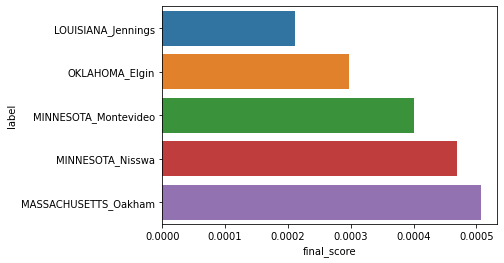

In [35]:
final_score_bar = sns.barplot(data=all_adj_props.iloc[0:5, :], x='final_score', y='label')
plt.show()

# Extending the analysis

#### Did the process of assigning weights change anything in terms of identifying the most crime-free safe cities?

In [36]:
# Changing the proportion column name for each crime so that the columns corresponding to different crimes can be distinguished
murder_manslaughter.rename(columns={'proportion':'murder_manslaughter_nonadj_p'}, inplace=True)
rape.rename(columns={'proportion':'rape_nonadj_p'}, inplace=True)
robbery.rename(columns={'proportion':'robbery_nonadj_p'}, inplace=True)
aggravated_assault.rename(columns={'proportion':'aggravated_assault_nonadj_p'}, inplace=True)
burglary.rename(columns={'proportion':'burglary_nonadj_p'}, inplace=True)
larceny_theft.rename(columns={'proportion':'larceny_theft_nonadj_p'}, inplace=True) 
motor_vehicle_theft.rename(columns={'proportion':'motor_vehicle_theft_nonadj_p'}, inplace=True)
arson.rename(columns={'proportion':'arson_nonadj_p'}, inplace=True)

In [37]:
non_adj_props = murder_manslaughter[['murder_manslaughter_nonadj_p']].join([rape[['rape_nonadj_p']], robbery[['robbery_nonadj_p']], aggravated_assault[['aggravated_assault_nonadj_p']], burglary[['burglary_nonadj_p']], larceny_theft[['larceny_theft_nonadj_p']], motor_vehicle_theft[['motor_vehicle_theft_nonadj_p']], arson[['arson_nonadj_p']]])

In [38]:
non_adj_props['nonadj_final_score'] = non_adj_props.sum(axis=1)
non_adj_props.sort_values('nonadj_final_score', inplace=True)

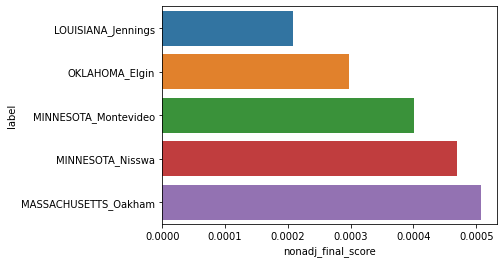

In [39]:
# Need to reindex to have the appropriate labels for a bar chart
non_adj_props.reset_index(inplace=True)

# Combining the state and city labels
non_adj_props.loc[:, 'label'] = non_adj_props['state'] + '_' + non_adj_props['city']

# Visualizing the safest cities determined by non adjusted final score
nonadj_score_bar = sns.barplot(data=non_adj_props.iloc[0:5, :], x='nonadj_final_score', y='label')
plt.show()

#### The answer is clear. The weights were too insignificant to make a difference in the rankings. This is because the proportions were so small to begin with that multiplying such a small number by a number slightly below 1 had no discernible effect.

#### What are the most unsafe cities?

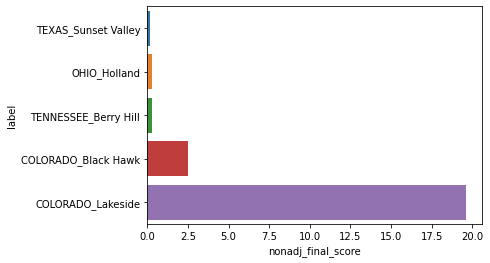

In [40]:
nonadj_score_bar_unsafe = sns.barplot(data=non_adj_props.tail(), x='nonadj_final_score', y='label')
plt.show()

#### The graph reveals two errors, both for cities from Colorado. Most likely, they resulted from data entry errors because none of the other values are even greater than one. Let us look at the results excluding those cities.

In [41]:
display(non_adj_props.shape)
non_adj_props.drop(index=[5771, 5772], inplace=True)

(5773, 12)

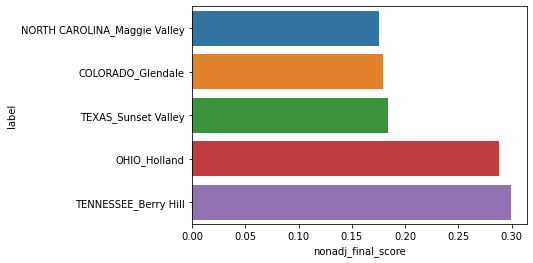

In [42]:
nonadj_score_bar_unsafe = sns.barplot(data=non_adj_props.tail(), x='nonadj_final_score', y='label')
plt.show()